In [ ]:
#import requirements
!pip install transformers
from transformers import CLIPProcessor, CLIPModel
import torch
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 47.3 MB/s eta 0:00:00


In [ ]:
# create the labels
my_label = ('Daffodil','Snowdrop','LilyVally','Bluebell','Crocus','Iris','Tigerlily','Tulip','Fritillary','Sunflower','Daisy','ColtsFoot','Dandelion','Cowslip','Buttercup','Windflower','Pansy');
clip_labels = [f"a photo of a {label}" for label in my_label]
clip_labels

['a photo of a Daffodil',
 'a photo of a Snowdrop',
 'a photo of a LilyVally',
 'a photo of a Bluebell',
 'a photo of a Crocus',
 'a photo of a Iris',
 'a photo of a Tigerlily',
 'a photo of a Tulip',
 'a photo of a Fritillary',
 'a photo of a Sunflower',
 'a photo of a Daisy',
 'a photo of a ColtsFoot',
 'a photo of a Dandelion',
 'a photo of a Cowslip',
 'a photo of a Buttercup',
 'a photo of a Windflower',
 'a photo of a Pansy']

In [ ]:
# initialization of the model

model_id = "openai/clip-vit-base-patch32"

processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id)

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/568 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/862k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [ ]:
# if you have CUDA set it to the active device like this
device = "cuda" if torch.cuda.is_available() else "cpu"
# move the model to the device
model.to(device)

device

'cpu'

In [ ]:
# create label tokens
label_tokens = processor(
    text=clip_labels,
    padding=True,
    images=None,
    return_tensors='pt'
).to(device)

label_tokens['input_ids'][0][:10]

tensor([49406,   320,  1125,   539,   320,  9972,   898, 17942, 49407])

In [ ]:
# encode tokens to sentence embeddings
label_emb = model.get_text_features(**label_tokens)

# detach from pytorch gradient computation
label_emb = label_emb.detach().cpu().numpy()
label_emb.shape

(17, 512)

In [ ]:
label_emb.min(), label_emb.max()

(-1.3331285, 5.054735)

In [ ]:
# normalization
label_emb = label_emb / np.linalg.norm(label_emb, axis=0)
label_emb.min(), label_emb.max()

(-0.80274296, 0.78017867)

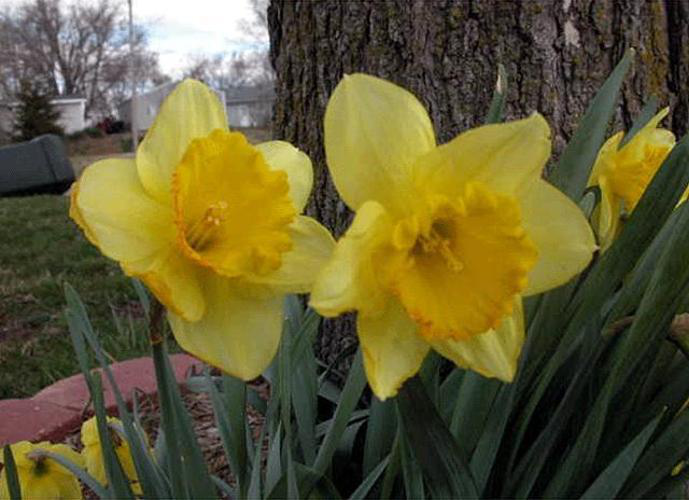

In [ ]:
#open image
path_to_image = "/content/drive/MyDrive/17_Flower/jpg/image_0001.jpg";
from PIL import Image
img = Image.open(path_to_image)
img

In [ ]:
# encode the image
image = processor(
    text=None,
    images=img,
    return_tensors='pt'
)['pixel_values'].to(device)
image.shape

torch.Size([1, 3, 224, 224])

In [ ]:
img_emb = model.get_image_features(image)
img_emb.shape

torch.Size([1, 512])

In [ ]:
img_emb = img_emb.detach().cpu().numpy()

In [ ]:
scores = np.dot(img_emb, label_emb.T)
scores.shape

(1, 17)

In [ ]:
# get index of highest score
pred = np.argmax(scores)
print("predicted = ",pred)

temp = path_to_image.split("_")[2].split(".");
print("Actual = ", int(int(temp[0])/80))

predicted =  0
Actual =  0


In [ ]:
# find text label with highest score
my_label[pred]

'Daffodil'

In [ ]:
# test all the images
path = '/content/drive/MyDrive/17_Flower/jpg/'
preds = []
batch_size = 32

for i in range(1,1361):
  print(i,end=",")
  file_name = path+'image_'+str(i).zfill(4)+'.jpg'
  img = Image.open(file_name)
  images = processor(
      text=None,
      images=img,
      return_tensors='pt'
  )['pixel_values'].to(device)
  img_emb = model.get_image_features(images)
  img_emb = img_emb.detach().cpu().numpy()
  scores = np.dot(img_emb, label_emb.T)
  preds.extend(np.argmax(scores, axis=1))

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

In [ ]:
# accuracy
true_preds = []
temp_ans = 0
for i,ele in enumerate(preds):
    if int(i/80) == ele:
        true_preds.append(1)
    else:
        true_preds.append(0)

(sum(true_preds) / len(true_preds))*100


77.3529411764706